# TEST BOXSIZE on P0

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from LSSutils.lab import run_ConvolvedFFTPower
from LSSutils import setup_logging

In [2]:
setup_logging('info')

Here are some parameters, z cuts, paths to the data and random catalogs

In [5]:
zmin = 0.8
zmax = 2.2
galaxy_path = '/B/Shared/mehdi/eboss/data/v7_2/0.3/eBOSS_QSO_clustering_NGC_v7_2_0.3.dat.fits'
random_path = '/B/Shared/mehdi/eboss/data/v7_2/0.3/eBOSS_QSO_clustering_NGC_v7_2_0.3.ran.fits'

boxsize set to 6600 Mpc/h, nmesh = 512 (default of the code)

In [8]:
pk_eva = run_ConvolvedFFTPower(galaxy_path, random_path, './test_pk_boxsize/pk_ngc_512_6600.json',
                              zmin=zmin, zmax=zmax, boxsize=6600, return_pk=True)

[ 000002.91 ]   0: 05-30 15:13  CatalogSource   INFO     Extra arguments to FileType: ('/B/Shared/mehdi/eboss/data/v7_2/0.3/eBOSS_QSO_clustering_NGC_v7_2_0.3.dat.fits',) {}
[ 000002.91 ]   0: 05-30 15:13  CatalogSource   INFO     Extra arguments to FileType: ('/B/Shared/mehdi/eboss/data/v7_2/0.3/eBOSS_QSO_clustering_NGC_v7_2_0.3.ran.fits',) {}
[ 000125.75 ]   0: 05-30 15:15  FKPCatalog      INFO     cartesian coordinate range: [-3297.8030435  -3224.33057084   535.88896155] : [-192.64109033 3296.96259119 3277.10565511]
[ 000125.76 ]   0: 05-30 15:15  FKPCatalog      INFO     BoxSize = [6600. 6600. 6600.]
[ 000125.76 ]   0: 05-30 15:15  FKPCatalog      INFO     BoxCenter = [-1745.22206691    36.31601017  1906.49730833]
[ 000125.79 ]   0: 05-30 15:15  ConvolvedFFTPower INFO     using compensation function CompensateTSCShotnoise for source 'first'
[ 000125.79 ]   0: 05-30 15:15  ConvolvedFFTPower INFO     using compensation function CompensateTSCShotnoise for source 'second'
[ 000126.78 ] 

boxsize is set inside nbodykit, based on the randoms

In [9]:
pk_default = run_ConvolvedFFTPower(galaxy_path, random_path, './test_pk_boxsize/pk_ngc_512_bsvar.json',
                              zmin=zmin, zmax=zmax, return_pk=True) # default 

[ 000582.89 ]   0: 05-30 15:23  CatalogSource   INFO     Extra arguments to FileType: ('/B/Shared/mehdi/eboss/data/v7_2/0.3/eBOSS_QSO_clustering_NGC_v7_2_0.3.dat.fits',) {}
[ 000582.89 ]   0: 05-30 15:23  CatalogSource   INFO     Extra arguments to FileType: ('/B/Shared/mehdi/eboss/data/v7_2/0.3/eBOSS_QSO_clustering_NGC_v7_2_0.3.ran.fits',) {}
[ 000693.66 ]   0: 05-30 15:25  FKPCatalog      INFO     cartesian coordinate range: [-3297.8030435  -3224.33057084   535.88896155] : [-192.64109033 3296.96259119 3277.10565511]
[ 000693.67 ]   0: 05-30 15:25  FKPCatalog      INFO     BoxSize = [3168. 6652. 2797.]
[ 000693.67 ]   0: 05-30 15:25  FKPCatalog      INFO     BoxCenter = [-1745.22206691    36.31601017  1906.49730833]
[ 000693.67 ]   0: 05-30 15:25  ConvolvedFFTPower INFO     using compensation function CompensateTSCShotnoise for source 'first'
[ 000693.67 ]   0: 05-30 15:25  ConvolvedFFTPower INFO     using compensation function CompensateTSCShotnoise for source 'second'
[ 000708.61 ] 

In [10]:
pk_bs10k = run_ConvolvedFFTPower(galaxy_path, random_path, './test_pk_boxsize/pk_ngc_1024_bs10k.json',
                              zmin=zmin, zmax=zmax, return_pk=True, boxsize=10000., nmesh=1024)

[ 001077.74 ]   0: 05-30 15:31  CatalogSource   INFO     Extra arguments to FileType: ('/B/Shared/mehdi/eboss/data/v7_2/0.3/eBOSS_QSO_clustering_NGC_v7_2_0.3.dat.fits',) {}
[ 001077.75 ]   0: 05-30 15:31  CatalogSource   INFO     Extra arguments to FileType: ('/B/Shared/mehdi/eboss/data/v7_2/0.3/eBOSS_QSO_clustering_NGC_v7_2_0.3.ran.fits',) {}
[ 001189.08 ]   0: 05-30 15:33  FKPCatalog      INFO     cartesian coordinate range: [-3297.8030435  -3224.33057084   535.88896155] : [-192.64109033 3296.96259119 3277.10565511]
[ 001189.08 ]   0: 05-30 15:33  FKPCatalog      INFO     BoxSize = [10000. 10000. 10000.]
[ 001189.08 ]   0: 05-30 15:33  FKPCatalog      INFO     BoxCenter = [-1745.22206691    36.31601017  1906.49730833]
[ 001189.09 ]   0: 05-30 15:33  ConvolvedFFTPower INFO     using compensation function CompensateTSCShotnoise for source 'first'
[ 001189.09 ]   0: 05-30 15:33  ConvolvedFFTPower INFO     using compensation function CompensateTSCShotnoise for source 'second'
[ 001208.48

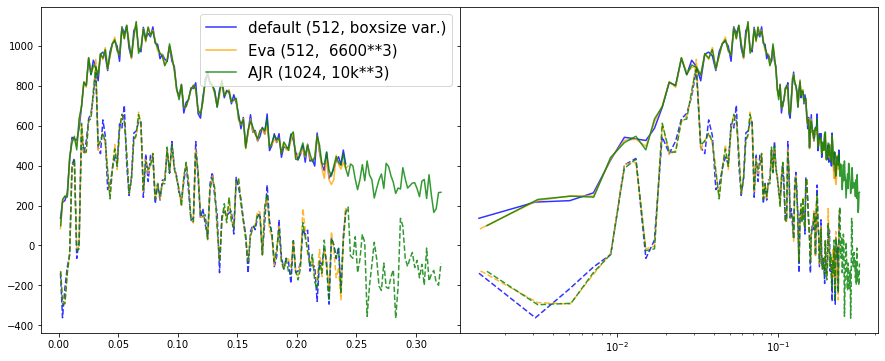

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)
fig.subplots_adjust(wspace=0)

c  = ['b', 'orange', 'g']
i=0
for pki, ni in zip([pk_default, pk_eva, pk_bs10k],
                   ['default (512, boxsize var.)',
                   'Eva (512,  6600**3)',
                   'AJR (1024, 10k**3)']):
    
    ax[0].plot(pki.poles['k'], pki.poles['k']*(pki.poles['power_0']-pki.attrs['shotnoise']), alpha=0.8, label=ni, c=c[i])
    ax[1].plot(pki.poles['k'], pki.poles['k']*(pki.poles['power_0']-pki.attrs['shotnoise']), alpha=0.8, c=c[i])

    ax[0].plot(pki.poles['k'], pki.poles['k']*(pki.poles['power_2']), alpha=0.8, ls='--', c=c[i])
    ax[1].plot(pki.poles['k'], pki.poles['k']*(pki.poles['power_2']), alpha=0.8, ls='--', c=c[i])
    i += 1

    
ax[1].set_xscale('log')
ax[0].legend(fontsize=15)

In [3]:
import nbodykit.lab as nb

In [5]:
d = nb.ConvolvedFFTPower.load('/B/Shared/mehdi/eboss/data/v7_2/0.3/pk_NGC_v7_2_0.3_wsystot_512_standard.json')
d0 = nb.ConvolvedFFTPower.load('/B/Shared/mehdi/eboss/data/v7_2/0.3/pk_NGC_v7_2_0.3_wsystotnhiz_512_standard.json')

In [6]:
for k in d.attrs:
    print(k, d.attrs[k], d0.attrs[k])

poles [0, 2, 4] [0, 2, 4]
dk 0.002 0.002
kmin 0.0 0.0
kmax None None
Nmesh [512 512 512] [512 512 512]
BoxSize [3168. 6652. 2797.] [3170. 6648. 2796.]
BoxPad [0.02 0.02 0.02] [0.02 0.02 0.02]
BoxCenter [-1745.22206691    36.31601017  1906.49730833] [-1745.86462298    39.3557639   1907.11859643]
mesh.resampler tsc tsc
mesh.interlaced False False
alpha 0.02009817996985074 0.020099915899806937
data.norm 3.3197369484623342 3.3197369484623347
randoms.norm 3.3199815051142787 3.319633381924404
shotnoise 63068.48619786596 63075.02377317954
data.N 218209 218209
data.W 231342.84658612308 231342.84658612305
data.W2 209279.0551078206 209279.0551078206
data.num_per_cell 0.0015592504673288808 0.0015592504673288808
randoms.N 11099807 11099858
randoms.W 11510636.631434303 11509642.514889585
randoms.W2 10412748.502605494 10411973.852831189
randoms.num_per_cell 0.07758102195416014 0.07757525036358229
data.ext 1 1
randoms.ext 1 1
sigma8 0.8343562909865011 0.8343562909865011
Omega0_m 0.31 0.31
h 0.676 0.6

In [10]:
import numpy as np

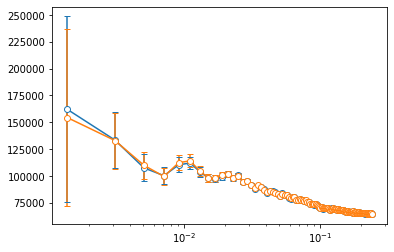

In [15]:
for di in [d, d0]:
    plt.errorbar(di.poles['k'], di.poles['power_0'].real,
                 yerr=di.poles['power_0'] / np.sqrt(0.5*di.poles['modes']),
            capsize=3, marker='o', mfc='w')
plt.xscale('log')

In [59]:
output_dir = os.path.dirname(os.path.abspath('../eBOSS_QSO_SGC_v7_2_0.4_plain_lowmidhigh.pdf'))
output_dir

'/home/mehdi/github'

In [60]:
if not os.path.exists(output_dir):
    print('hi')
    #os.makedirs(output_dir)    

In [64]:
import nbodykit.lab as  nb

In [65]:
d = nb.ConvolvedFFTPower.load('/B/Shared/mehdi/eboss/data/v7_2/0.3/pk_NGC_v7_2_0.3_wsystot_512_standard.json')
d0 = nb.ConvolvedFFTPower.load('/B/Shared/mehdi/eboss/data/v7_2/0.3/pk_001/pk_NGC_v7_2_0.3_wsystot_512_standard.json')

In [9]:
import  nbodykit.lab as nb

In [10]:
r0 = nb.ConvolvedFFTPower.load('/B/Shared/mehdi/eboss/data/v7_2/0.3/pk_001/pk_NGC_v7_2_0.3_wsystot_512_standard_test.json')
r1 = nb.ConvolvedFFTPower.load('/B/Shared/mehdi/eboss/data/v7_2/0.3/pk_001/pk_NGC_v7_2_0.3_wsystot_512_standard.json')

In [63]:
for a,b in r0.attrs.items():
    print(a,b)

poles [0, 2, 4]
dk 0.001
kmin 0.0
kmax None
Nmesh [64 64 64]
BoxSize [3168. 6652. 2797.]
BoxPad [0.02 0.02 0.02]
BoxCenter [-1745.22206691    36.31601017  1906.49730833]
mesh.resampler tsc
mesh.interlaced False
alpha 0.020098179969850735
data.norm 3.3197369484623342
randoms.norm 3.319981505114278
shotnoise 63068.48619786599
data.N 218209
data.W 231342.84658612305
data.W2 209279.0551078206
data.num_per_cell 0.798336239272387
randoms.N 11099807
randoms.W 11510636.631434303
randoms.W2 10412748.5026055
randoms.num_per_cell 39.72148324053001
data.ext 1
randoms.ext 1
sigma8 0.8343562909865011
Omega0_m 0.31
h 0.676
n_s 0.9667
Omega0_b 0.04774081211494009
Omega0_lambda 0.6899207570435895


In [12]:
import  numpy as np

[]

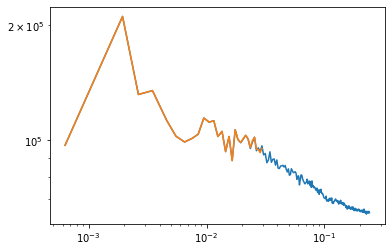

In [13]:
plt.plot(r1.poles['k'].real,r1.poles['power_0'].real)
plt.plot(r0.poles['k'].real,r0.poles['power_0'].real)
plt.loglog()

[0.00140858 0.00317674]
[0.00137628 0.00308928]


Text(0, 0.5, 'P(k)')

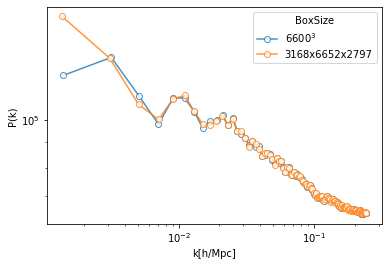

In [29]:
for ri in [r1, r2]:
    plt.loglog(ri.poles['k'], ri.poles['power_0'], marker='o', mfc='w', alpha=0.8)
    print(ri.poles['k'][:2])
    
plt.legend([r'6600$^{3}$', '3168x6652x2797'], title='BoxSize')
plt.xlabel('k[h/Mpc]')
plt.ylabel('P(k)')